Import numpy, scipy, and matplotlib and define constants

In [7]:
import numpy as np
import scipy as scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
r = np.linspace(0.0000001,15,1500) #GeV-1

#constants
m1 = 4.7
m2 = 4.7
#GeV/c^2 Mass of the Bottomonium
invmu = 1/m1 + 1/m2
mu = 1/invmu
u0 = np.array([0.,1.0]) #dots to make sure number is real
c = 6.87
d = 0.1 #- solving for this
#A = -7.8613
E = 9.402-m1-m2 #GeV/c^2 Mass of Bottomonium Ground State - Mass of individual Bottom Quarks

Model with float energy

In [8]:
def model_E(u,r,l,A):
    dvdr = (u[0]*l*(l+1))/(r**2) - 2*mu*u[0]*(E - c*(r**d) - A)
    return (u[1],dvdr)

Code to Normalise the Wavefunction

In [9]:
def square(list):
    ret = []
    for i in list:
        ret.append(i ** 2)
    return ret



def normalize_psi(psi, r):
    int_psi_square = scipy.integrate.simps(square(psi), r)
    return psi**2/(int_psi_square)

def square_psi(psi):
    return (np.array(psi))**2

Code to find turning points and nodes

In [10]:
def turning_points(x):
    number_tps = 0
    for i in range(1, len(x)-1):
        if ((x[i-1] < x[i] and x[i+1] < x[i]) or (x[i-1] > x[i] and x[i+1] > x[i])):
            number_tps += 1
    return number_tps

def nodes(x):
    number_ns = 0
    for i in range(0, len(x)-1):
        if x[i]*x[i+1]<0:
            number_ns += 1
    return number_ns

Iteration code to find the energy of a given, l state and and a known energy range. ENERGY RANGE MUST BE FAIRLY CLOSE TO CORRECT ENERGY.

In [11]:
def beta_search(l,E1,E3):
    plt.xlabel("Distance from Nucleus ($MeV$)")
    plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    plt.legend(loc = "upper right")
    for i in range(1000):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return E2, plt.plot(r,square_psi(normalize_psi(b,r)), color = 'red')

Now testing the code for the n = 2, l = 0 level

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-7.192813844661435, [<matplotlib.lines.Line2D at 0x7fcb75454f70>])

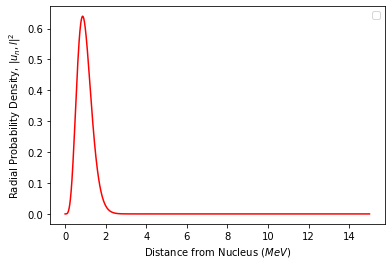

In [12]:
beta_search(0,-7,-8.5)

Now testing the code for the n = 2, l = 1 level

In [7]:
energy_iterate(1,0.6,3)

NameError: name 'energy_iterate' is not defined

In [ ]:
energy_iterate(1,0.85,3)

Now testing the code for the n = 0, l = 1 level

In [ ]:
energy_iterate(0,0.01, 0.5)
#plt.savefig('Radial_Probability_Density of the (2,1) state.png', dpi=600, bbox_inches='tight')

Now we plot all energy levels on one graph

In [13]:
def energy_iterate_total(l,E1,E3):
    for i in range(1000):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return square_psi(normalize_psi(b,r))

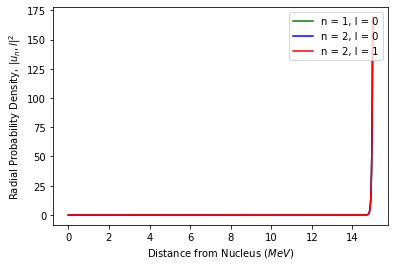

In [14]:
n1l0 = energy_iterate_total(0,-0.02,0.01)
n2l0 = energy_iterate_total(0,-9.9e-06,-1.0e-6)
n2l1 = energy_iterate_total(1,-9.9e-06,-1.0e-6)
plt.plot(r,n1l0, label = 'n = 1, l = 0', color = "green")
plt.plot(r,n2l0, label = 'n = 2, l = 0', color = 'blue')
plt.plot(r,n2l1, label = 'n = 2, l = 1', color = "red")
plt.xlabel("Distance from Nucleus ($MeV$)")
plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
plt.legend(loc = "upper right")
plt.savefig('Radial_Probability_Density of the all states.png', dpi=600, bbox_inches='tight')

In [ ]:
p = [1,2,3,4,5,6,7,8,9,10]
q = [2,4,8,16,32,64,128,256,512,1024]
sum(square(normalize_psi(q,p)))

